In [17]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import scipy.misc

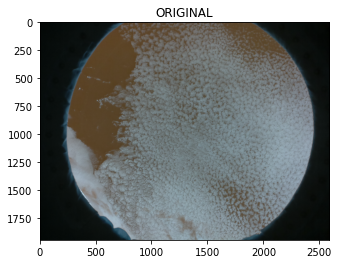

In [18]:
img = cv.imread('./dataset_image/train3.jpg')

plt.imshow(img)
plt.title('ORIGINAL')
plt.show()

In [19]:
def cut_image(img):
        w,h,_ = img.shape
        P = [int(w/2),int(h/2)]
        perc_h = 65
        perc_w = 65
        padding_top = int((P[1] * perc_h) / 100)
        padding_side = int((P[0] * perc_w) / 100 ) 

        return img[P[0] - padding_side:P[0]+ padding_side,P[1]- padding_top:P[1]+padding_top]

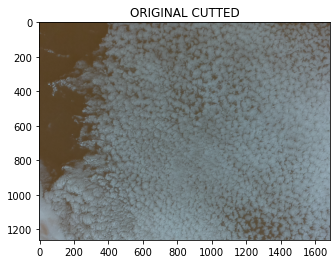

In [20]:
img = cut_image(img)

plt.imshow(img)
plt.title('ORIGINAL CUTTED')
plt.show()

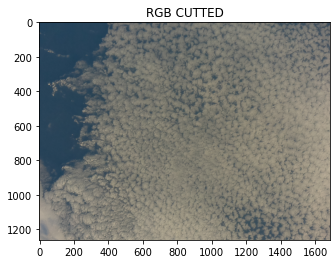

In [21]:
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(rgb)
plt.title('RGB CUTTED')
plt.show()

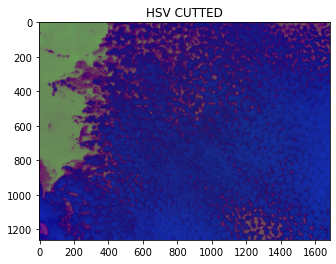

In [22]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.imshow(hsv)
plt.title('HSV CUTTED')
plt.show()

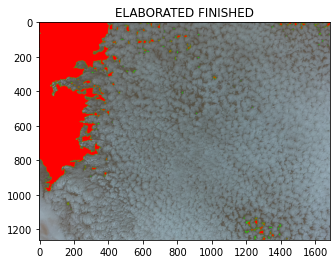

In [23]:
s = hsv[:, :, 1]
ret, thresh = cv.threshold(s, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[-2] 
cv.drawContours(img, contours, -1, (0,255,0), 2)

x, y, w, h = cv.boundingRect(contours[0])
thresh[y:y+h, x:x+w] = 255 - thresh[y:y+h, x:x+w]
contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[-2]

for c in contours:
    if cv.contourArea(c) > 4:  
        cv.drawContours(img, [c], -1, (255, 0, 0), thickness=cv.FILLED)
        
plt.imshow(img)
plt.title('ELABORATED FINISHED')
plt.show()

In [24]:
#count of total pixel
total = img.shape[0] * img.shape[1]
print(f"total pixel: {total}")

#count of red pixel
sought = [255,0,0]
red  = np.count_nonzero(np.all(img==sought,axis=2))
print(f"red pixel: {red}")

#perc of black pixels
perc = (red*100)/total
perc = "%.3f" % perc
print(f"perc: {perc}%")

total pixel: 2125208
red pixel: 254646
perc: 11.982%
